In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
# dataset path 
df = pd.read_csv("dataset.csv")
pd.set_option('display.max_columns', None)
print(len(df))
print(len(df.columns))
df.head()

8845
149


,gameId,plateformId,gameDuration,seasonId,gameMode,participantId_x1,matchHistoryUri_x1,championId_x1,championName_x1,kills_x1,deaths_x1,assists_x1,totalDammageDealt_x1,visionScore_x1,totalDamageTaken_x1,turretKills_x1,totalMinionsKilled_x1,champLevel_x1,participantId_x2,matchHistoryUri_x2,championId_x2,championName_x2,kills_x2,deaths_x2,assists_x2,totalDammageDealt_x2,visionScore_x2,totalDamageTaken_x2,turretKills_x2,totalMinionsKilled_x2,champLevel_x2,participantId_x3,matchHistoryUri_x3,championId_x3,championName_x3,kills_x3,deaths_x3,assists_x3,totalDammageDealt_x3,visionScore_x3,totalDamageTaken_x3,turretKills_x3,totalMinionsKilled_x3,champLevel_x3,participantId_x4,matchHistoryUri_x4,championId_x4,championName_x4,kills_x4,deaths_x4,assists_x4,totalDammageDealt_x4,visionScore_x4,totalDamageTaken_x4,turretKills_x4,totalMinionsKilled_x4,champLevel_x4,participantId_x5,matchHistoryUri_x5,championId_x5,championName_x5,kills_x5,deaths_x5,assists_x5,totalDammageDealt_x5,visionScore_x5,totalDamageTaken_x5,turretKills_x5,totalMinionsKilled_x5,champLevel_x5,is_winner_x,teamId_x,firstBlood_x,firstTower_x,firstBaron_x,firstDragon_x,towerKills_x,participantId_y1,matchHistoryUri_y1,championId_y1,championName_y1,kills_y1,deaths_y1,assists_y1,totalDammageDealt_y1,visionScore_y1,totalDamageTaken_y1,turretKills_y1,totalMinionsKilled_y1,champLevel_y1,participantId_y2,matchHistoryUri_y2,championId_y2,championName_y2,kills_y2,deaths_y2,assists_y2,totalDammageDealt_y2,visionScore_y2,totalDamageTaken_y2,turretKills_y2,totalMinionsKilled_y2,champLevel_y2,participantId_y3,matchHistoryUri_y3,championId_y3,championName_y3,kills_y3,deaths_y3,assists_y3,totalDammageDealt_y3,visionScore_y3,totalDamageTaken_y3,turretKills_y3,totalMinionsKilled_y3,champLevel_y3,participantId_y4,matchHistoryUri_y4,championId_y4,championName_y4,kills_y4,deaths_y4,assists_y4,totalDammageDealt_y4,visionScore_y4,totalDamageTaken_y4,turretKills_y4,totalMinionsKilled_y4,champLevel_y4,participantId_y5,matchHistoryUri_y5,championId_y5,championName_y5,kills_y5,deaths_y5,assists_y5,totalDammageDealt_y5,visionScore_y5,totalDamageTaken_y5,turretKills_y5,totalMinionsKilled_y5,champLevel_y5,is_winner_y,teamId_y,firstBlood_y,firstTower_y,firstBaron_y,firstDragon_y,towerKills
0,5205972431,EUW1,2008,13,CLASSIC,1,/v1/stats/player_history/EUW1/2089893920870752,11,Master Yi,5,10,1,183362,18,36863,2,29,14,2,/v1/stats/player_history/EUW1/237332891,122,Darius,12,12,3,120885,14,49607,1,150,16,3,/v1/stats/player_history/EUW1/233138516,238,Zed,9,8,2,122282,16,22046,2,151,16,4,/v1/stats/player_history/EUW1/209550772,117,Lulu,0,9,8,16743,54,20651,1,18,13,5,/v1/stats/player_history/EUW1/2573983317452064,21,Miss Fortune,5,7,3,133173,22,27644,0,176,14,Fail,100,True,True,False,True,6,6,/v1/stats/player_history/EUW1/2089893920870752,56,Nocturne,7,3,16,197003,26,35310,1,30,18,7,/v1/stats/player_history/EUW1/237332891,523,Aphelios,23,7,11,217791,27,26187,2,209,17,8,/v1/stats/player_history/EUW1/233138516,350,Yuumi,1,5,29,20352,53,10917,1,4,16,9,/v1/stats/player_history/EUW1/209550772,58,Renekton,5,9,9,107494,22,40800,1,122,16,10,/v1/stats/player_history/EUW1/2573983317452064,99,Lux,10,8,6,170953,16,16507,3,169,17,Win,200,False,False,True,False,8
1,5205876463,EUW1,1618,13,CLASSIC,1,/v1/stats/player_history/EUW1/212111580,147,Seraphine,3,11,13,45389,49,15541,1,40,12,2,/v1/stats/player_history/EUW1/239370063,21,Miss Fortune,12,10,9,101020,11,19627,1,104,14,3,/v1/stats/player_history/EUW1/2089893920870752,11,Master Yi,22,8,3,183412,18,29513,1,50,16,4,/v1/stats/player_history/EUW1/237332891,27,Singed,2,9,7,74770,6,18434,1,111,14,5,/v1/stats/player_history/EUW1/233138516,101,Xerath,4,5,15,64417,12,10832,1,83,14,Win,100,True,False,False,True,5,6,/v1/stats/player_history/EUW1/212111580,104,Graves,8,10,6,125942,12,24965,0,26,13,7,/v1/stats/player_history/EUW1/239370063,222,Jinx,7,8,14,93279,15,20544,2,137,14,8,/v1/stats/player_history/EUW1/2089893920870752,25,Morgana,11,8,19,36076,56,21017,0,33,13,9,/v1/stats/player_

## Data exploration

In [65]:
# removing useless columns 

cols = [col for col in df.columns if "uri" in col.lower() or "participant" in col.lower()]
df = df.drop([*cols, "gameId"], axis=1)
df.head()

,plateformId,gameDuration,seasonId,gameMode,championId_x1,championName_x1,kills_x1,deaths_x1,assists_x1,totalDammageDealt_x1,visionScore_x1,totalDamageTaken_x1,turretKills_x1,totalMinionsKilled_x1,champLevel_x1,championId_x2,championName_x2,kills_x2,deaths_x2,assists_x2,totalDammageDealt_x2,visionScore_x2,totalDamageTaken_x2,turretKills_x2,totalMinionsKilled_x2,champLevel_x2,championId_x3,championName_x3,kills_x3,deaths_x3,assists_x3,totalDammageDealt_x3,visionScore_x3,totalDamageTaken_x3,turretKills_x3,totalMinionsKilled_x3,champLevel_x3,championId_x4,championName_x4,kills_x4,deaths_x4,assists_x4,totalDammageDealt_x4,visionScore_x4,totalDamageTaken_x4,turretKills_x4,totalMinionsKilled_x4,champLevel_x4,championId_x5,championName_x5,kills_x5,deaths_x5,assists_x5,totalDammageDealt_x5,visionScore_x5,totalDamageTaken_x5,turretKills_x5,totalMinionsKilled_x5,champLevel_x5,is_winner_x,teamId_x,firstBlood_x,firstTower_x,firstBaron_x,firstDragon_x,towerKills_x,championId_y1,championName_y1,kills_y1,deaths_y1,assists_y1,totalDammageDealt_y1,visionScore_y1,totalDamageTaken_y1,turretKills_y1,totalMinionsKilled_y1,champLevel_y1,championId_y2,championName_y2,kills_y2,deaths_y2,assists_y2,totalDammageDealt_y2,visionScore_y2,totalDamageTaken_y2,turretKills_y2,totalMinionsKilled_y2,champLevel_y2,championId_y3,championName_y3,kills_y3,deaths_y3,assists_y3,totalDammageDealt_y3,visionScore_y3,totalDamageTaken_y3,turretKills_y3,totalMinionsKilled_y3,champLevel_y3,championId_y4,championName_y4,kills_y4,deaths_y4,assists_y4,totalDammageDealt_y4,visionScore_y4,totalDamageTaken_y4,turretKills_y4,totalMinionsKilled_y4,champLevel_y4,championId_y5,championName_y5,kills_y5,deaths_y5,assists_y5,totalDammageDealt_y5,visionScore_y5,totalDamageTaken_y5,turretKills_y5,totalMinionsKilled_y5,champLevel_y5,is_winner_y,teamId_y,firstBlood_y,firstTower_y,firstBaron_y,firstDragon_y,towerKills
0,EUW1,2008,13,CLASSIC,11,Master Yi,5,10,1,183362,18,36863,2,29,14,122,Darius,12,12,3,120885,14,49607,1,150,16,238,Zed,9,8,2,122282,16,22046,2,151,16,117,Lulu,0,9,8,16743,54,20651,1,18,13,21,Miss Fortune,5,7,3,133173,22,27644,0,176,14,Fail,100,True,True,False,True,6,56,Nocturne,7,3,16,197003,26,35310,1,30,18,523,Aphelios,23,7,11,217791,27,26187,2,209,17,350,Yuumi,1,5,29,20352,53,10917,1,4,16,58,Renekton,5,9,9,107494,22,40800,1,122,16,99,Lux,10,8,6,170953,16,16507,3,169,17,Win,200,False,False,True,False,8
1,EUW1,1618,13,CLASSIC,147,Seraphine,3,11,13,45389,49,15541,1,40,12,21,Miss Fortune,12,10,9,101020,11,19627,1,104,14,11,Master Yi,22,8,3,183412,18,29513,1,50,16,27,Singed,2,9,7,74770,6,18434,1,111,14,101,Xerath,4,5,15,64417,12,10832,1,83,14,Win,100,True,False,False,True,5,104,Graves,8,10,6,125942,12,24965,0,26,13,222,Jinx,7,8,14,93279,15,20544,2,137,14,25,Morgana,11,8,19,36076,56,21017,0,33,13,150,Gnar,10,8,3,80259,19,19272,0,116,13,84,Akali,6,9,10,62490,9,25355,0,96,14,Fail,200,False,True,False,False,2
2,EUW1,1588,13,CLASSIC,51,Caitlyn,5,5,6,109346,10,11696,2,136,13,163,Taliyah,11,6,8,60388,40,11926,1,32,13,238,Zed,12,5,2,118817,31,15843,2,157,16,114,Fiora,13,8,10,88632,3,31053,2,132,15,5,Xin Zhao,5,3,7,106733,18,22520,3,18,13,Win,100,True,True,False,True,8,41,Gangplank,7,10,7,112701,22,24866,1,148,15,203,Kindred,10,8,5,86090,5,24516,0,20,13,45,Veigar,3,10,4,58797,10,21989,0,106,13,21,Miss Fortune,1,11,8,37216,3,21576,1,53,11,268,Azir,6,8,5,73078,21,17593,0,82,12,Fail,200,False,False,False,False,2
3,EUW1,1605,13,CLASSIC,25,Morgana,1,8,10,20017,35,15957,1,19,11,22,Ashe,8,5,10,83824,15,10644,1,123,13,91,Talon,4,11,6,54537,12,19135,0,68,12,56,Nocturne,8,5,8,110077,15,18072,3,27,14,6,Urgot,11,3,5,149744,17,18810,2,152,15,Win,100,False,True,False,False,7,55,Katarina,17,5,2,109149,14,17655,0,126,14,526,Rell,2,9,13,27418,17,19389,0,33,13,81,Ezreal,3,6,8,74772,12,11150,2,132,13,75,Nasus,1,4,0,27663,3,11276,0,58,9,11,Master Yi,9,8,8,129453,14,25142,0,25,13,Fail,200,True,False,False,True,2
4,EUW1,1353,13,CLASSIC,57,Maokai,3,2,11,42097,18,13299,0,17,11,18,Tristana,4,3,7,55948,10,9875,1,8

In [69]:
print(f"{len(df.columns)} columns left")

127 columns left


# Goal : predicting which team is going to win

<h2> We need to declare clearly who is the winner</h2>
<ul>
    <li> Let's create a 'winner' column by combining 'is_winner_x' and 'is_winner_y</li>
    <li> Winner will take the value 0 or 1 : 0 means that the x team won, 1 means that the y team won</li>
</ul>

In [66]:
df["is_winner_x"].replace({"Win" : 1, "Fail" : 0}, inplace=True)
# renaming the a more understandable target feature's name
df = df.rename(columns={"is_winner_x" : "outcome"})
# removing the unnecessary feature 'is_winner_y'
df = df.drop("is_winner_y", axis=1)
df.head()

,plateformId,gameDuration,seasonId,gameMode,championId_x1,championName_x1,kills_x1,deaths_x1,assists_x1,totalDammageDealt_x1,visionScore_x1,totalDamageTaken_x1,turretKills_x1,totalMinionsKilled_x1,champLevel_x1,championId_x2,championName_x2,kills_x2,deaths_x2,assists_x2,totalDammageDealt_x2,visionScore_x2,totalDamageTaken_x2,turretKills_x2,totalMinionsKilled_x2,champLevel_x2,championId_x3,championName_x3,kills_x3,deaths_x3,assists_x3,totalDammageDealt_x3,visionScore_x3,totalDamageTaken_x3,turretKills_x3,totalMinionsKilled_x3,champLevel_x3,championId_x4,championName_x4,kills_x4,deaths_x4,assists_x4,totalDammageDealt_x4,visionScore_x4,totalDamageTaken_x4,turretKills_x4,totalMinionsKilled_x4,champLevel_x4,championId_x5,championName_x5,kills_x5,deaths_x5,assists_x5,totalDammageDealt_x5,visionScore_x5,totalDamageTaken_x5,turretKills_x5,totalMinionsKilled_x5,champLevel_x5,outcome,teamId_x,firstBlood_x,firstTower_x,firstBaron_x,firstDragon_x,towerKills_x,championId_y1,championName_y1,kills_y1,deaths_y1,assists_y1,totalDammageDealt_y1,visionScore_y1,totalDamageTaken_y1,turretKills_y1,totalMinionsKilled_y1,champLevel_y1,championId_y2,championName_y2,kills_y2,deaths_y2,assists_y2,totalDammageDealt_y2,visionScore_y2,totalDamageTaken_y2,turretKills_y2,totalMinionsKilled_y2,champLevel_y2,championId_y3,championName_y3,kills_y3,deaths_y3,assists_y3,totalDammageDealt_y3,visionScore_y3,totalDamageTaken_y3,turretKills_y3,totalMinionsKilled_y3,champLevel_y3,championId_y4,championName_y4,kills_y4,deaths_y4,assists_y4,totalDammageDealt_y4,visionScore_y4,totalDamageTaken_y4,turretKills_y4,totalMinionsKilled_y4,champLevel_y4,championId_y5,championName_y5,kills_y5,deaths_y5,assists_y5,totalDammageDealt_y5,visionScore_y5,totalDamageTaken_y5,turretKills_y5,totalMinionsKilled_y5,champLevel_y5,teamId_y,firstBlood_y,firstTower_y,firstBaron_y,firstDragon_y,towerKills
0,EUW1,2008,13,CLASSIC,11,Master Yi,5,10,1,183362,18,36863,2,29,14,122,Darius,12,12,3,120885,14,49607,1,150,16,238,Zed,9,8,2,122282,16,22046,2,151,16,117,Lulu,0,9,8,16743,54,20651,1,18,13,21,Miss Fortune,5,7,3,133173,22,27644,0,176,14,0,100,True,True,False,True,6,56,Nocturne,7,3,16,197003,26,35310,1,30,18,523,Aphelios,23,7,11,217791,27,26187,2,209,17,350,Yuumi,1,5,29,20352,53,10917,1,4,16,58,Renekton,5,9,9,107494,22,40800,1,122,16,99,Lux,10,8,6,170953,16,16507,3,169,17,200,False,False,True,False,8
1,EUW1,1618,13,CLASSIC,147,Seraphine,3,11,13,45389,49,15541,1,40,12,21,Miss Fortune,12,10,9,101020,11,19627,1,104,14,11,Master Yi,22,8,3,183412,18,29513,1,50,16,27,Singed,2,9,7,74770,6,18434,1,111,14,101,Xerath,4,5,15,64417,12,10832,1,83,14,1,100,True,False,False,True,5,104,Graves,8,10,6,125942,12,24965,0,26,13,222,Jinx,7,8,14,93279,15,20544,2,137,14,25,Morgana,11,8,19,36076,56,21017,0,33,13,150,Gnar,10,8,3,80259,19,19272,0,116,13,84,Akali,6,9,10,62490,9,25355,0,96,14,200,False,True,False,False,2
2,EUW1,1588,13,CLASSIC,51,Caitlyn,5,5,6,109346,10,11696,2,136,13,163,Taliyah,11,6,8,60388,40,11926,1,32,13,238,Zed,12,5,2,118817,31,15843,2,157,16,114,Fiora,13,8,10,88632,3,31053,2,132,15,5,Xin Zhao,5,3,7,106733,18,22520,3,18,13,1,100,True,True,False,True,8,41,Gangplank,7,10,7,112701,22,24866,1,148,15,203,Kindred,10,8,5,86090,5,24516,0,20,13,45,Veigar,3,10,4,58797,10,21989,0,106,13,21,Miss Fortune,1,11,8,37216,3,21576,1,53,11,268,Azir,6,8,5,73078,21,17593,0,82,12,200,False,False,False,False,2
3,EUW1,1605,13,CLASSIC,25,Morgana,1,8,10,20017,35,15957,1,19,11,22,Ashe,8,5,10,83824,15,10644,1,123,13,91,Talon,4,11,6,54537,12,19135,0,68,12,56,Nocturne,8,5,8,110077,15,18072,3,27,14,6,Urgot,11,3,5,149744,17,18810,2,152,15,1,100,False,True,False,False,7,55,Katarina,17,5,2,109149,14,17655,0,126,14,526,Rell,2,9,13,27418,17,19389,0,33,13,81,Ezreal,3,6,8,74772,12,11150,2,132,13,75,Nasus,1,4,0,27663,3,11276,0,58,9,11,Master Yi,9,8,8,129453,14,25142,0,25,13,200,True,False,False,True,2
4,EUW1,1353,13,CLASSIC,57,Maokai,3,2,11,42097,18,13299,0,17,11,18,Tristana,4,3,7,55948,10,9875,1,87,10,98,Shen,3,4,8,52504,10,15579,0,85,12,11

### At this point, I'm satisfied with the columns. SeasonId might be removed later as I'm only working with one season here

## Let's do a simple data exploration 

<p> We have an almost perfectly balanced dataset ! </p>

In [67]:
# is our dataset imbalanced ? 
outcome_ratio = df["outcome"].value_counts(normalize=True)
print(f"{round(outcome_ratio[0] * 100,2)} % of win | {round(outcome_ratio[1] * 100,2)} % of looses")

49.92 % of win | 50.08 % of looses


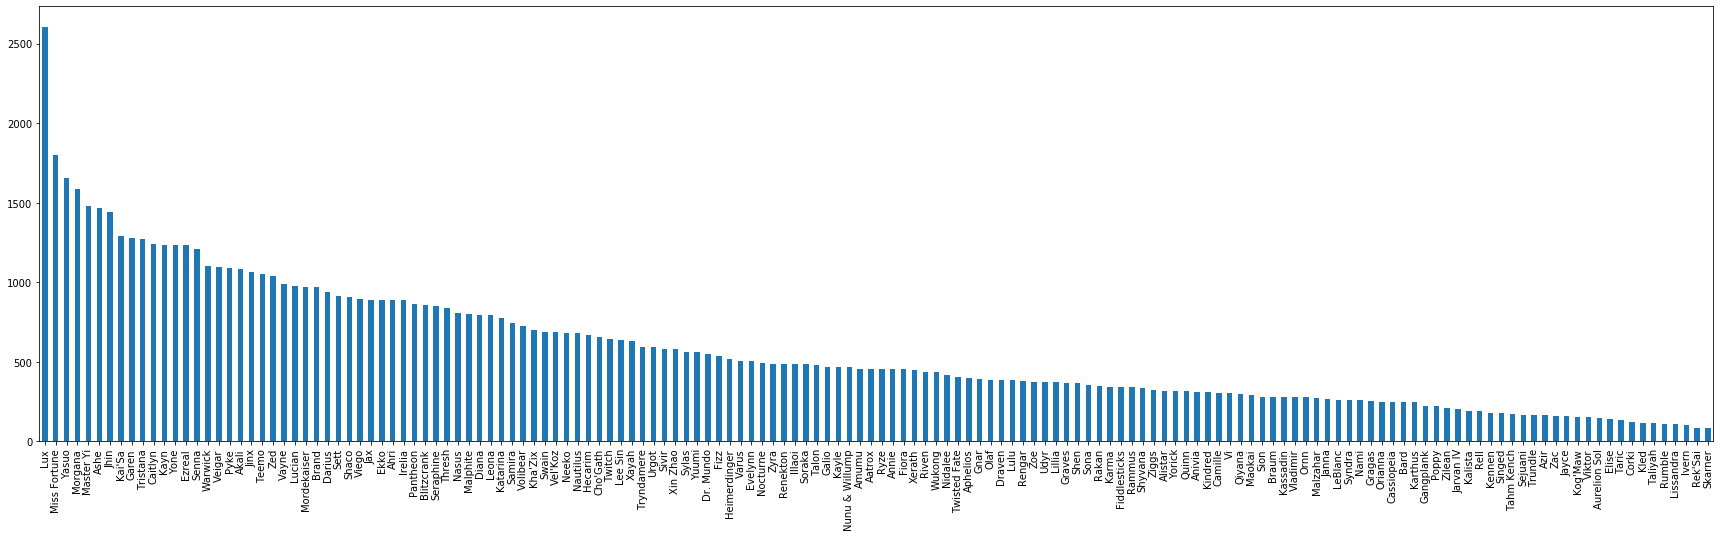

In [133]:
## what are the most played champions ?  
all_champs = df[[col for col in df.columns if "championName" in col]]
champs_count = pd.Series(0,index=all_champs["championName_x1"].unique())
for column in all_champs.columns: 
    champs_count += all_champs[column].value_counts()

champs_count = champs_count.sort_values(ascending=False)
# count plot 
plt.figure(figsize=(30,8))
plt.xticks(rotation=90)
champs_count.plot(kind="bar") 